In [87]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
crime = pd.read_csv("crime_newtaipei.csv")

In [89]:
crime.head()

,區,竊盜數目,總人口
0,板橋區,1433,"555,001"
1,中和區,828,"412,114"
2,永和區,401,"221,265"
3,三重區,1191,"385,550"
4,新莊區,1277,"418,219"


In [90]:
seven = pd.read_csv("7-11_newtaipei.csv")

In [91]:
seven.head()

,區,有廁所的,小7數目
0,萬里區,2,4
1,金山區,4,4
2,板橋區,55,118
3,汐止區,28,47
4,深坑區,5,7


In [92]:
import locale

In [93]:
locale.setlocale(locale.LC_NUMERIC,'')

'en_US.UTF-8'

In [94]:
crime['竊盜數目'] = crime['竊盜數目'].astype(str).apply(locale.atof)

In [95]:
crime['總人口'] = crime['總人口'].astype(str).apply(locale.atof)

In [96]:
crime.head()

,區,竊盜數目,總人口
0,板橋區,1433.0,555001.0
1,中和區,828.0,412114.0
2,永和區,401.0,221265.0
3,三重區,1191.0,385550.0
4,新莊區,1277.0,418219.0


In [97]:
crime['竊盜比例'] = crime.竊盜數目/crime.總人口

In [98]:
crime.head()

,區,竊盜數目,總人口,竊盜比例
0,板橋區,1433.0,555001.0,0.002582
1,中和區,828.0,412114.0,0.002009
2,永和區,401.0,221265.0,0.001812
3,三重區,1191.0,385550.0,0.003089
4,新莊區,1277.0,418219.0,0.003053


In [99]:
seven['有廁所的'] = seven['有廁所的'].astype(str).apply(locale.atof)

In [100]:
seven['小7數目'] = seven['小7數目'].astype(str).apply(locale.atof)

In [101]:
seven['有廁所比例'] = seven['有廁所的']/seven['小7數目']

In [102]:
seven.head()

,區,有廁所的,小7數目,有廁所比例
0,萬里區,2.0,4.0,0.500000
1,金山區,4.0,4.0,1.000000
2,板橋區,55.0,118.0,0.466102
3,汐止區,28.0,47.0,0.595745
4,深坑區,5.0,7.0,0.714286


In [108]:
df = pd.merge(seven,crime)

In [110]:
df

,區,有廁所的,小7數目,有廁所比例,竊盜數目,總人口,竊盜比例
0,金山區,4.0,4.0,1.000000,46.0,21657.0,0.002124
1,板橋區,55.0,118.0,0.466102,1433.0,555001.0,0.002582
2,汐止區,28.0,47.0,0.595745,318.0,201151.0,0.001581
3,瑞芳區,4.0,9.0,0.444444,135.0,39812.0,0.003391
4,新店區,33.0,71.0,0.464789,508.0,302085.0,0.001682
5,永和區,18.0,46.0,0.391304,401.0,221265.0,0.001812
6,中和區,42.0,96.0,0.437500,828.0,412114.0,0.002009
7,土城區,41.0,53.0,0.773585,623.0,236946.0,0.002629
8,三峽區,25.0,28.0,0.892857,508.0,116058.0,0.004377
9,樹林區,29.0,44.0,0.659091,373.0,183811.0,0.002029


In [111]:
x = np.array(df['竊盜比例'])

In [113]:
y = np.array(df['有廁所比例'])

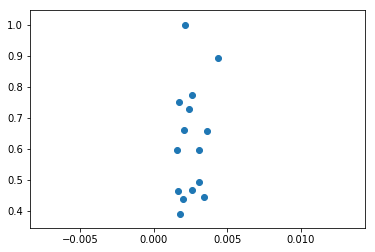

In [114]:
plt.scatter(x,y)

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [120]:
X = x.reshape(len(x),1)

In [121]:
x_train ,x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state = 9487)

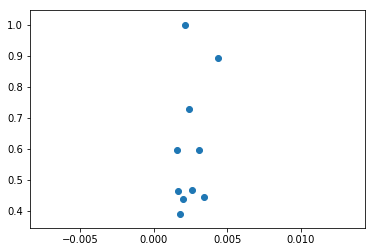

In [122]:
plt.scatter(x_train,y_train)

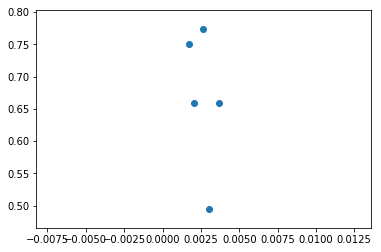

In [123]:
plt.scatter(x_test,y_test)

In [124]:
regr = LinearRegression()

In [125]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [126]:
Y_pred = regr.predict(x_test)

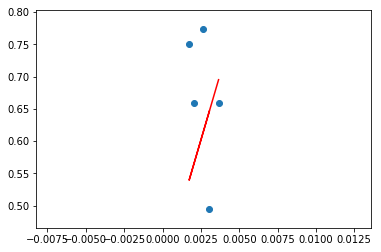

In [130]:
plt.scatter(x_test,y_test)
plt.plot(x_test,Y_pred,'r')